In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
Bank_Nifty_Data = pd.read_csv("BankNiftyData2020-2024.csv")
Copy = Bank_Nifty_Data.copy() # This will create a copy of Actual Dataset
Data = pd.DataFrame(Copy)  # Creating a Dataframe

In [5]:
print(Data.shape) # This will give me shape means total rows and columns in form of Tuples
print(Data.dtypes) # This will give me Data Types of Columns

(1180, 7)
Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object


In [7]:
# Now we will change the data types of columns 
Data["Date"] = pd.to_datetime(Data["Date"],dayfirst = True)
Converted_columns = ["Price","Open","High","Low"]
Data[Converted_columns] = Data[Converted_columns].replace(",","",regex = True).astype(float)

In [8]:
Data.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

In [9]:
Data.rename(columns = {"Price":"Close", "Vol.":"Volume"},inplace = True) # this will rename our columns name

In [10]:
Data = Data.drop(columns = "Change %") # Drop the column

In [11]:
Data.set_index("Date",inplace = True)

In [12]:
Data["Close_Next_Day"] = Data["Close"].shift(-1) # - here we create column name Close_Next_Day 

In [13]:
# creating a function to convert volume columns in actual numbers
def convert_columns(volume):
    if "B" in volume:
        return float(volume.replace("B",""))*1000000000
    elif "M" in volume:
        return float(volume.replace("M",""))*1000000
    elif "K" in volume:
        return float(volume.replace("K",""))*1000
    else:
        return float(volume)

In [14]:
Data["Volume"] = Data["Volume"].apply(convert_columns) # apply the function to the volume column

In [15]:
Data.isna().sum() # one columns contain null values

Close             0
Open              0
High              0
Low               0
Volume            0
Close_Next_Day    1
dtype: int64

In [16]:
Data = Data.iloc[::-1] # reverse the whole Data

In [18]:
Data['Daily Return'] = Data['Close'].pct_change()
Data["Daily Return"].dropna(inplace=True)

In [19]:
Data.isna().sum() # To check if there is null values or not 

Close             0
Open              0
High              0
Low               0
Volume            0
Close_Next_Day    1
Daily Return      1
dtype: int64

In [20]:
Data.bfill(inplace = True)


In [21]:
# Here we train our dataset, so it can be predict values by using linear regression model
x = Data[["Open","High","Low"]]
y = Data["Close"]
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print("Actual Values : ",y_test.values)
print("Predicited Values : ",predictions)
len(predictions)

Actual Values :  [24892.5  17107.3  44409.5  34275.4  28278.8  34439.85 40776.8  51272.3
 37235.85 47835.8  34584.35 32270.35 46310.9  35710.5  43098.7  35712.1
 22964.8  23874.55 38307.1  43252.35 33006.45 21679.4  44584.55 43103.75
 52396.8  37148.5  42782.   41468.3  34591.2  19959.9  22662.05 45996.8
 29820.9  44623.85 32574.65 42983.95 46064.45 44436.35 41366.5  39564.7
 43475.3  38987.15 20201.75 44481.75 45963.15 34996.   43352.1  44128.15
 26487.8  22466.2  47094.2  38287.85 29463.15 19057.05 33293.25 20580.2
 33922.4  44225.9  20317.6  43075.4  39684.8  43880.95 22584.65 35613.3
 50156.7  19352.9  43988.   21700.85 35579.15 38517.25 35212.   43954.45
 35359.45 23533.25 33425.1  36549.   41041.   20525.15 35673.4  40415.7
 36471.8  34745.   21534.5  35291.65 47262.   36816.1  34800.5  20724.9
 48508.55 35198.9  35834.75 37371.65 35847.4  46928.6  36368.05 32112.85
 36944.65 39805.75 29456.45 40834.65 35841.6  40323.65 45651.1  44161.55
 29177.05 37392.05 47124.6  47012.25 35232

236

In [22]:
# Here by using Rmse we check accuracy of a regression model.
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: {rmse}")
# Percentage error will be (168.228/37493)*100 = 0.44% error 

RMSE: 168.2280671707994


In [23]:
# Here i give custom values to check 
custom_x_test = pd.DataFrame({"Open":[1000,1300,54047.68] ,"High":[1122,1399,54465.72] ,"Low":[1040,1280,54012.18]})
custom_x_prediction = model.predict(custom_x_test)
print(f"The custom_x_prediction values is : {custom_x_prediction}")

The custom_x_prediction values is : [ 1133.89827175  1366.72870123 54387.16246288]


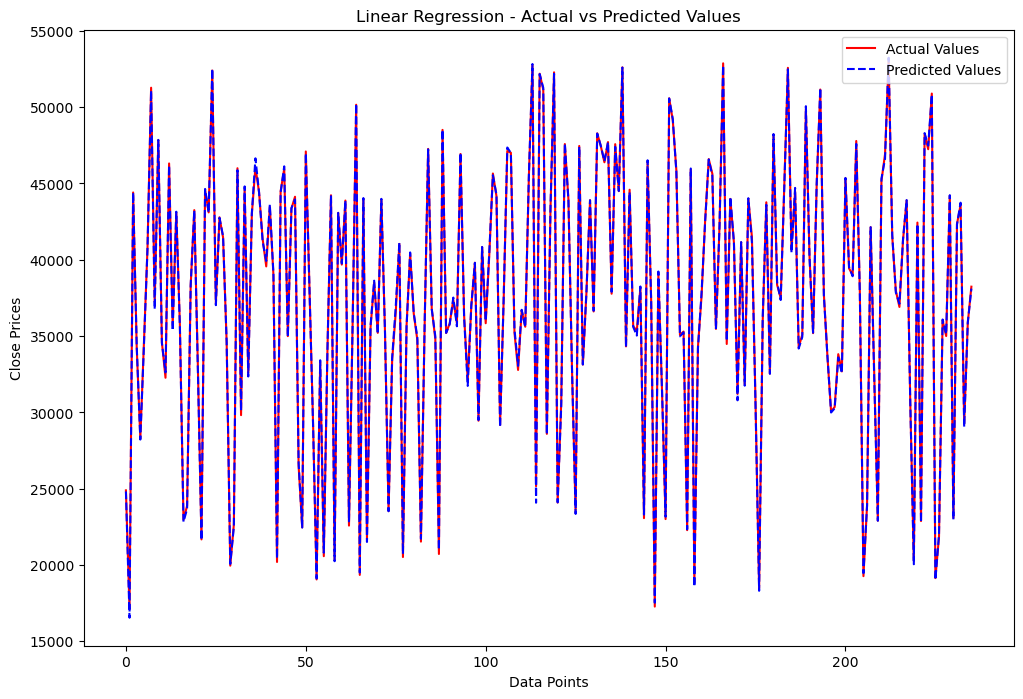

In [24]:
# plot the chart of actual vs predicited values
plt.figure(figsize = (12,8))
plt.plot(y_test.values , label = "Actual Values" , color = "red")
plt.plot(predictions, label = "Predicted Values" , color = "blue" , linestyle = "--")
plt.title("Linear Regression - Actual vs Predicted Values")
plt.xlabel("Data Points")
plt.ylabel("Close Prices")
plt.legend(loc ="upper right")

(array([18201., 18231., 18262., 18293., 18322., 18353., 18383., 18414.,
        18444., 18475., 18506., 18536., 18567., 18597., 18628., 18659.,
        18687., 18718., 18748., 18779., 18809., 18840., 18871., 18901.,
        18932., 18962., 18993., 19024., 19052., 19083., 19113., 19144.,
        19174., 19205., 19236., 19266., 19297., 19327., 19358., 19389.,
        19417., 19448., 19478., 19509., 19539., 19570., 19601., 19631.,
        19662., 19692., 19723., 19754., 19783., 19814., 19844., 19875.,
        19905., 19936., 19967., 19997., 20028., 20058.]),
 [Text(18201.0, 0, '2019-11'),
  Text(18231.0, 0, '2019-12'),
  Text(18262.0, 0, '2020-01'),
  Text(18293.0, 0, '2020-02'),
  Text(18322.0, 0, '2020-03'),
  Text(18353.0, 0, '2020-04'),
  Text(18383.0, 0, '2020-05'),
  Text(18414.0, 0, '2020-06'),
  Text(18444.0, 0, '2020-07'),
  Text(18475.0, 0, '2020-08'),
  Text(18506.0, 0, '2020-09'),
  Text(18536.0, 0, '2020-10'),
  Text(18567.0, 0, '2020-11'),
  Text(18597.0, 0, '2020-12'),
  Te

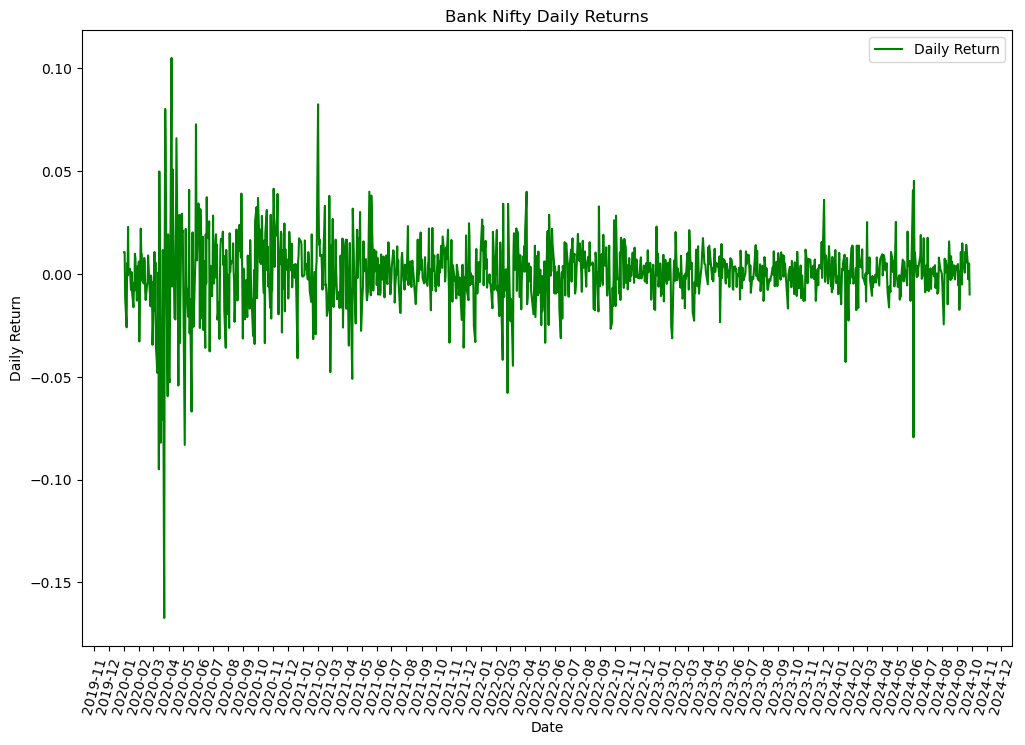

In [25]:
# Plot of Bank Nifty Daily Returns
plt.figure(figsize=(12, 8))
plt.plot(Data['Daily Return'], label='Daily Return', color='green')
plt.title('Bank Nifty Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks at each month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as YYYY-MM
plt.xticks(rotation=75) # - Rotate x-axis labels for better readability

In [26]:
#  Here i create columns of moving average that is 50 days and 200 days
Data["50 MA"] = Data["Close"].rolling(50).mean()
Data["200 MA"] = Data["Close"].rolling(200).mean()

(array([18201., 18231., 18262., 18293., 18322., 18353., 18383., 18414.,
        18444., 18475., 18506., 18536., 18567., 18597., 18628., 18659.,
        18687., 18718., 18748., 18779., 18809., 18840., 18871., 18901.,
        18932., 18962., 18993., 19024., 19052., 19083., 19113., 19144.,
        19174., 19205., 19236., 19266., 19297., 19327., 19358., 19389.,
        19417., 19448., 19478., 19509., 19539., 19570., 19601., 19631.,
        19662., 19692., 19723., 19754., 19783., 19814., 19844., 19875.,
        19905., 19936., 19967., 19997., 20028., 20058.]),
 [Text(18201.0, 0, '2019-11'),
  Text(18231.0, 0, '2019-12'),
  Text(18262.0, 0, '2020-01'),
  Text(18293.0, 0, '2020-02'),
  Text(18322.0, 0, '2020-03'),
  Text(18353.0, 0, '2020-04'),
  Text(18383.0, 0, '2020-05'),
  Text(18414.0, 0, '2020-06'),
  Text(18444.0, 0, '2020-07'),
  Text(18475.0, 0, '2020-08'),
  Text(18506.0, 0, '2020-09'),
  Text(18536.0, 0, '2020-10'),
  Text(18567.0, 0, '2020-11'),
  Text(18597.0, 0, '2020-12'),
  Te

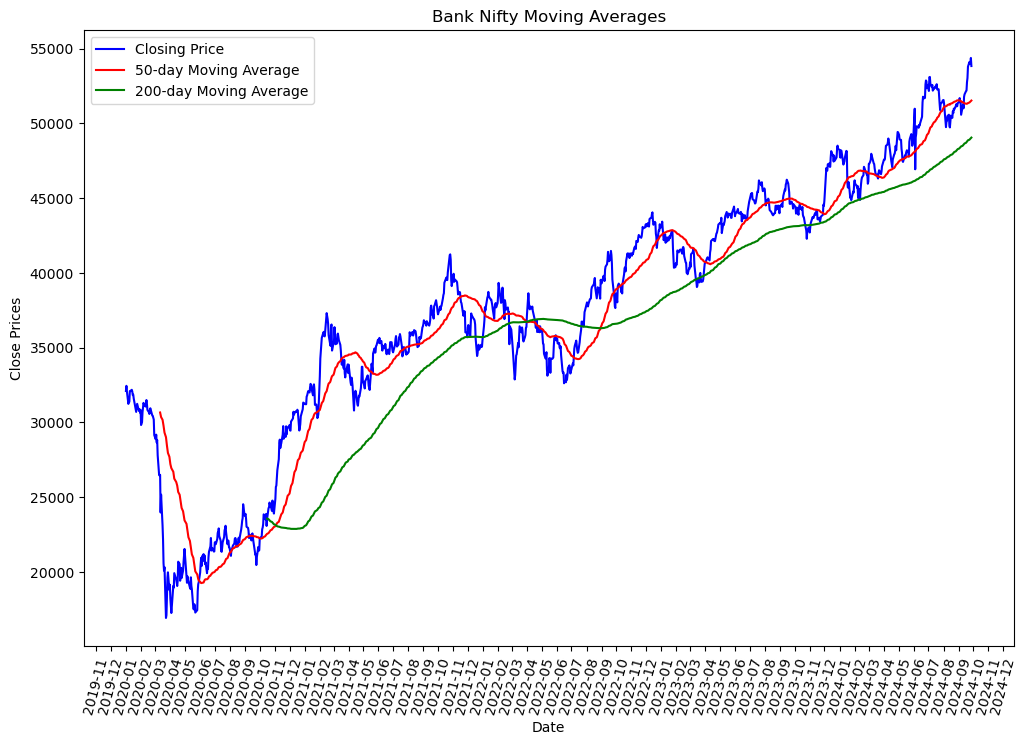

In [27]:
plt.figure(figsize=(12, 8))
plt.plot(Data['Close'], label='Closing Price', color='blue')
plt.plot(Data['50 MA'], label='50-day Moving Average', color='red')
plt.plot(Data['200 MA'], label='200-day Moving Average', color='green')
plt.title('Bank Nifty Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) 
plt.xticks(rotation=75) 

(array([17897., 18262., 18628., 18993., 19358., 19723.]),
 [Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024')])

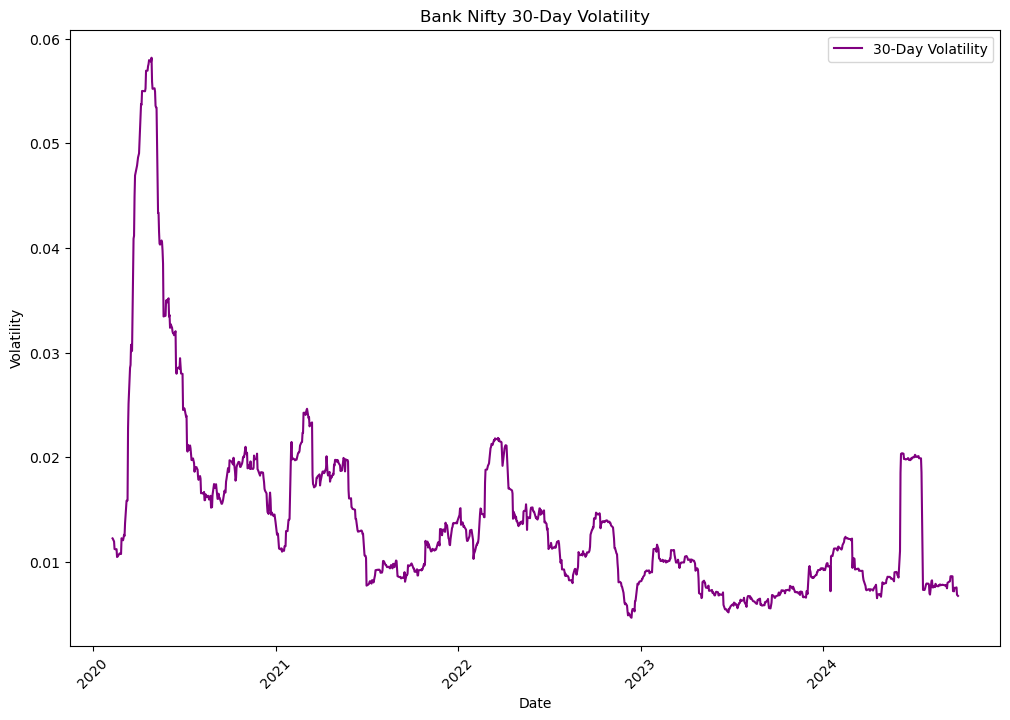

In [28]:
# - Here we take voltality of 30 days by use of standard deviation because it shows amount of dispersion from mean values
Data['30 Day Volatility'] = Data['Daily Return'].rolling(30).std()

plt.figure(figsize=(12, 8))
plt.plot(Data['30 Day Volatility'], label='30-Day Volatility', color='purple')
plt.title('Bank Nifty 30-Day Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.xticks(rotation =45)

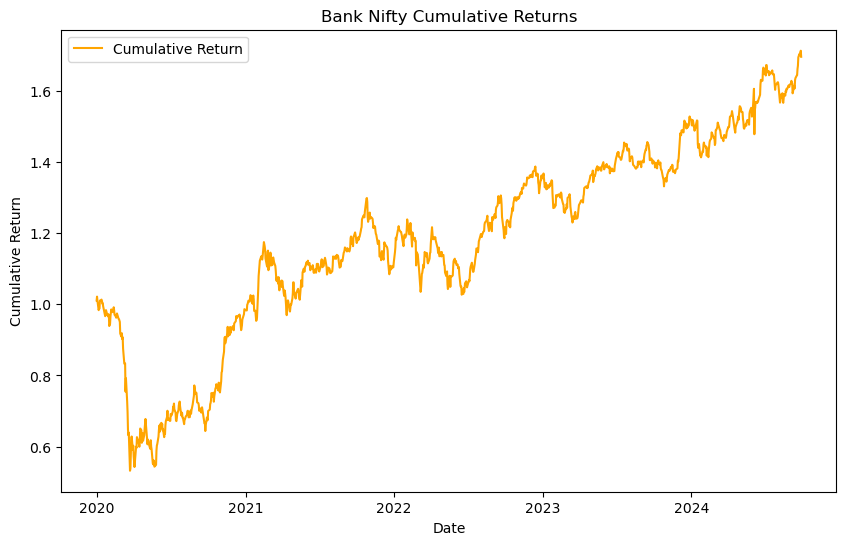

In [29]:
# Here we use cummulative return to find out how much our investment grows
Data['Cumulative Return'] = (1 + Data['Daily Return']).cumprod()
# - the reason of using cumprod because compounding take place.
# - If the daily returns  for three days were 1.02, 0.99, and 1.01  then Cumulative Return=1.02×0.99×1.01≈1.0201
plt.figure(figsize=(10, 6))
plt.plot(Data['Cumulative Return'], label='Cumulative Return', color='orange')
plt.title('Bank Nifty Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()

C:\Users\Vishal Saini\AppData\Roaming\Python\Python312\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


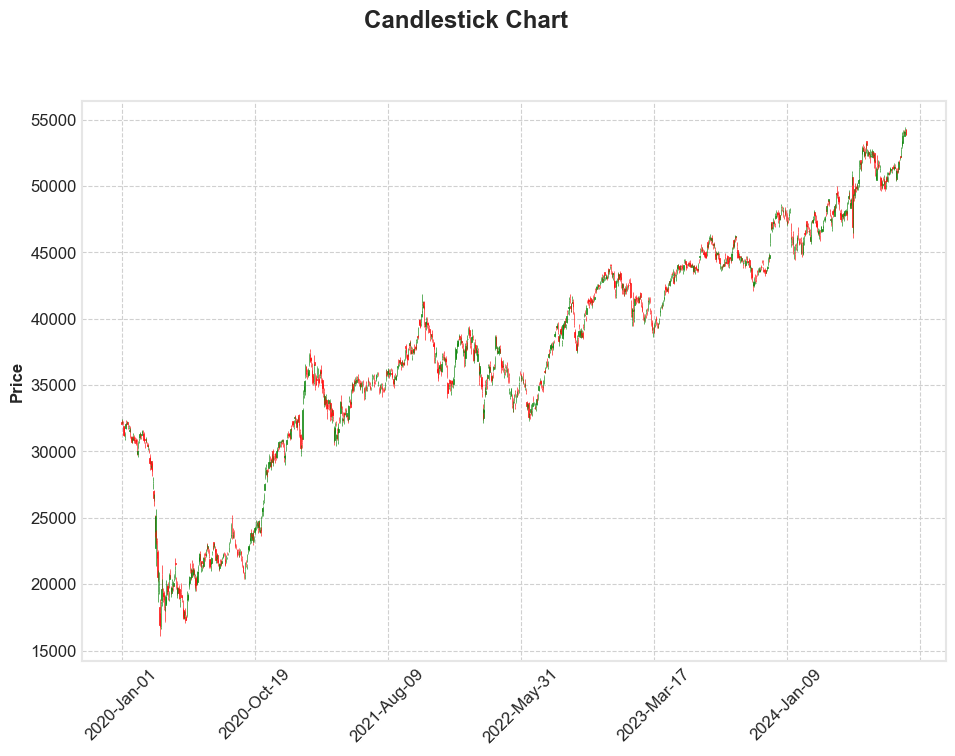

In [30]:
# Here we create the real candlesticks that seen in stock market charts
ohlc_data = Data[['Open', 'High', 'Low', 'Close']]

# Create a custom style
custom_style = mpf.make_mpf_style(base_mpf_style='binance', 
                                   marketcolors=mpf.make_marketcolors(up='green', down='red', inherit= True))

# Create and plot candlestick chart with custom colors
mpf.plot(ohlc_data, type='candle', style=custom_style, title='Candlestick Chart', figsize=(12, 8))

In [31]:
Data

,Close,Open,High,Low,Volume,Close_Next_Day,Daily Return,50 MA,200 MA,30 Day Volatility,Cumulative Return
Date,,,,,,,,,,,
2020-01-01,32102.90,32237.90,32348.00,32057.20,184670000.0,32102.90,0.010621,NaN,NaN,NaN,1.010621
2020-01-02,32443.85,32133.15,32465.45,32121.40,253560000.0,32102.90,0.010621,NaN,NaN,NaN,1.021354
2020-01-03,32069.25,32326.95,32329.80,31960.40,217580000.0,32443.85,-0.011546,NaN,NaN,NaN,1.009561
2020-01-06,31237.15,31910.45,31914.45,31170.55,256240000.0,32069.25,-0.025947,NaN,NaN,NaN,0.983366
2020-01-07,31399.40,31598.05,31851.45,31200.90,294370000.0,31237.15,0.005194,NaN,NaN,NaN,0.988474
...,...,...,...,...,...,...,...,...,...,...,...
2024-09-23,54105.80,53917.90,54197.95,53741.40,163670000.0,53793.20,0.005811,51395.496,48906.59850,0.007498,1.703286
2024-09-24,53968.60,54110.65,54247.70,53904.65,192600000.0,54105.80,-0.002536,51429.290,48941.38025,0.007550,1.698967
2024-09-25,54101.65,53794.00,54141.30,53792.85,184560000.0,53968.60,0.002465,51462.205,48977.71575,0.006839,1.703156
